In [6]:
import matplotlib.pyplot as plt
import random

class InvalidNumberException(Exception):
    "Raised when a number <= 1 Or the number is Negative"
    pass

class Collatz:

    def _main(self, num):
        self.seq = []
        self.stopTime = 0
        self.stepsList = []
        self.even = 0
        self.odd = 0
        self.evp = 0
        self.odp = 0
        self.even_list = []
        self.odd_list = []
        try:
            if num < 1:
                raise InvalidNumberException
            else:
                while num > 1:
                    self.stopTime += 1
                    self.seq.append(num)
                    self.stepsList.append(self.stopTime)

                    if num % 2 == 0:
                        self.even_list.append(num)
                        num = num / 2
                        self.even += 1
                    else:
                        self.odd_list.append(num)
                        num = 3 * num + 1
                        self.odd += 1


                self.evp = self.even / self.stopTime * 100
                self.odp = self.odd / self.stopTime * 100

        except InvalidNumberException:
            print("Exception Occurred : Invalid Number")

    def sequence(self, num):
        try:
            if num < 1:
                raise InvalidNumberException
            else:
                print("Sequence of", num)
                Step = 0
                while num > 1:
                    Step += 1
                    if num % 2 == 0:
                        num = num / 2
                    else:
                        num = 3 * num + 1
                    print(Step, " | ", int(num))
        except InvalidNumberException:
            print("Exception Occurred : Invalid Number")

    def _error_check(self, num):
        try:
            if num <= 1:
                raise InvalidNumberException
            else:
                self._main(num)
        except InvalidNumberException:
            print("Exception Occurred : Invalid Number ")

    def sequence_list(self, num):
        self._error_check(num)
        self._main(num)
        return self.seq

    def stop_time(self, num):
        self._error_check(num)
        self._main(num)
        return self.stopTime

    def maximum(self, num):
        self._error_check(num)
        self._main(num)
        return max(self.seq)

    def even_steps(self, num):
        self._error_check(num)
        self._main(num)
        return self.even

    def odd_steps(self, num):
        self._error_check(num)
        self._main(num)
        return self.odd

    def even_steps_percent(self, num):
        self._error_check(num)
        self._main(num)
        return self.evp

    def odd_steps_percent(self, num):
        self._error_check(num)
        self._main(num)
        return self.odp
    
    def even_steps_list(self, num):
        self._error_check(num)
        self._main(num)
        return self.even_list
    
    def odd_steps_list(self, num):
        self._error_check(num)
        self._main(num)
        return self.odd_list
    

    def stoptime_value_graph(self, num):
        self._error_check(num)
        plt.xlabel('Stoptime')
        plt.ylabel('Sequence value')
        plt.title('Stoptime VS Sequence value')
        plt.plot(self.stepsList, self.seq, color="black", linewidth='1',)
        plt.grid()
        plt.show()

    def stoptime_value_range_graph(self, start, end):
        if start >= end:
            print("Exception Occurred : Invalid Number")
        else:
            plt.xlabel('Stoptime(s)')
            plt.ylabel('Sequence value(s)')
            plt.title('Stoptime(s) VS Sequence value(s)')
            while start <= end:
                self._error_check(start)
                color = ["black", "red", "blue", "green", "purple"]
                plt.plot(self.stepsList, self.seq, color=random.choice(color), linewidth='1',)
                start += 1
            plt.grid()
            plt.show()

    def startvalue_stoptime_range_graph(self, start, end):
        if start >= end:
            print("First value should be less than end value")
        else:
            plt.xlabel('Startvalue(s)')
            plt.ylabel('StopTime(s)')
            plt.title('Startvalue(s) VS Stoptime(s)')
            NumList = []
            StoptimeList = []
            for i in range(start, end):
                self._error_check(i)
                NumList.append(i)
                StoptimeList.append(self.stopTime)
            color = ["black", "red", "blue", "green", "purple"]
            plt.plot(NumList, StoptimeList, color=random.choice(color), linewidth='0', marker='.')
            plt.grid()
            plt.show()

    def startvalue_max_range_graph(self, start, end, yaxis_limit=0, color=None):
        if yaxis_limit == 0:
            yaxis_limit = end
        if start >= end:
            raise InvalidNumberException
        else:
            plt.xlabel('Startvalue(s)')
            plt.ylabel('Max of Startvalue(s)')
            plt.title('Startvalue VS Maximums')
            NumList = []
            MaxList = []
            for i in range(start, end):
                self._error_check(i)
                self._main(i)
                NumList.append(i)
                MaxList.append(max(self.seq))
            if color is None:
                col = ["black", "red", "blue", "green", "purple"]
                plt.plot(NumList, MaxList, color=random.choice(col), linewidth='0', marker='.')
            else:
                plt.plot(NumList, MaxList, color=color, linewidth='0', marker='.')
            plt.ylim(0, yaxis_limit)
            plt.grid()
            plt.show()

# Example usage:
# if __name__ == "__main__":
#     collatz = Collatz()
#     collatz.stoptime_value_graph(20)


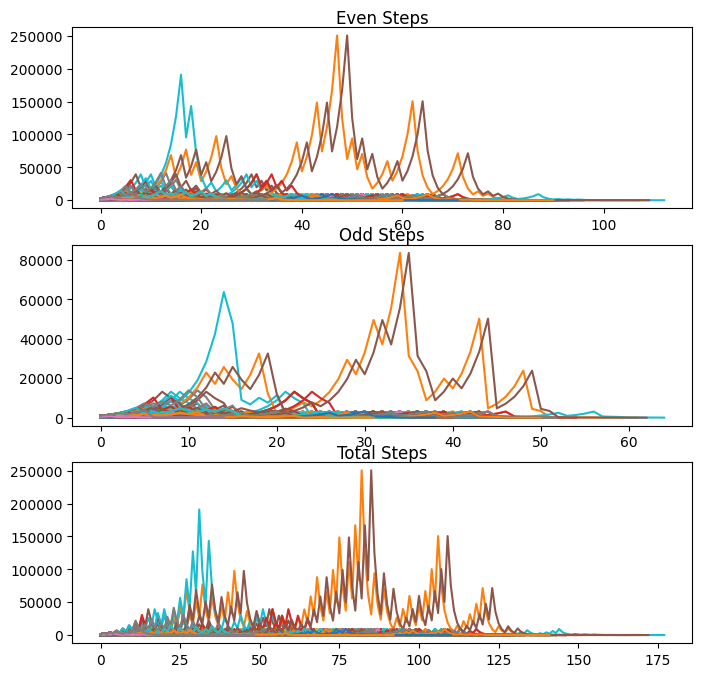

In [7]:
import  matplotlib.pyplot as plt

collatz = Collatz()

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 8))
for num in range(2,1000):
    even = collatz.even_steps_list(num)
    odd = collatz.odd_steps_list(num)
    steps = collatz.sequence_list(num)

    # print(f'Even Steps: {even}')
    # print(f'Odd Steps: {odd}')
    # print(f'Total Steps: {steps}')
    ax1.plot(even, label='Even Steps')
    ax2.plot(odd, label='Odd Steps')
    ax3.plot(steps, label='Total Steps')
    ax1.set_title('Even Steps',pad=0)
    ax2.set_title('Odd Steps',pad=0)
    ax3.set_title('Total Steps',pad=0)
    num += 1

plt.show()